In [1]:
# General Libraries
import numpy as np 
import pandas as pd 

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

## Gather, Access, and Clean Data

In [2]:
pd.set_option('display.max_columns', None)

### Gather Data

In [3]:
df = pd.read_csv(r'..\Flight_Delay_Prediction\flights.csv')
df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Assess Data

In [4]:
df.shape

(1048575, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

- Missing values in various columns

In [6]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64

- Missing values in various columns

In [16]:
len(df)

1048575

In [24]:
# Check percentages of missing values
round((df.isnull().mean() * 100), 2)
# (df.isnull().sum()/len(df)) * 100

YEAR                    0.00
MONTH                   0.00
DAY                     0.00
DAY_OF_WEEK             0.00
AIRLINE                 0.00
FLIGHT_NUMBER           0.00
TAIL_NUMBER             0.74
ORIGIN_AIRPORT          0.00
DESTINATION_AIRPORT     0.00
SCHEDULED_DEPARTURE     0.00
DEPARTURE_TIME          3.77
DEPARTURE_DELAY         3.77
SCHEDULED_TIME          0.00
ELAPSED_TIME            4.11
AIR_TIME                4.11
DISTANCE                0.00
SCHEDULED_ARRIVAL       0.00
ARRIVAL_TIME            3.94
DIVERTED                0.00
CANCELLED               0.00
CANCELLATION_REASON    96.14
AIR_SYSTEM_DELAY       78.21
SECURITY_DELAY         78.21
AIRLINE_DELAY          78.21
LATE_AIRCRAFT_DELAY    78.21
WEATHER_DELAY          78.21
dtype: float64

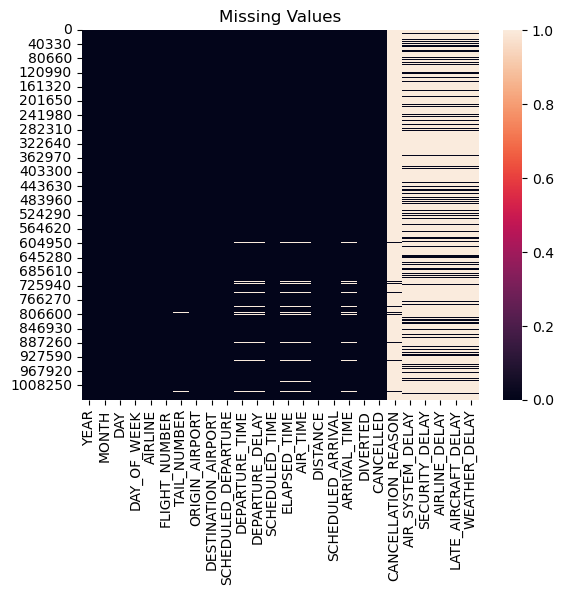

In [19]:
sns.heatmap(df.isnull())
plt.title("Missing Values")
plt.show()

In [20]:
import missingno as msno

<Axes: >

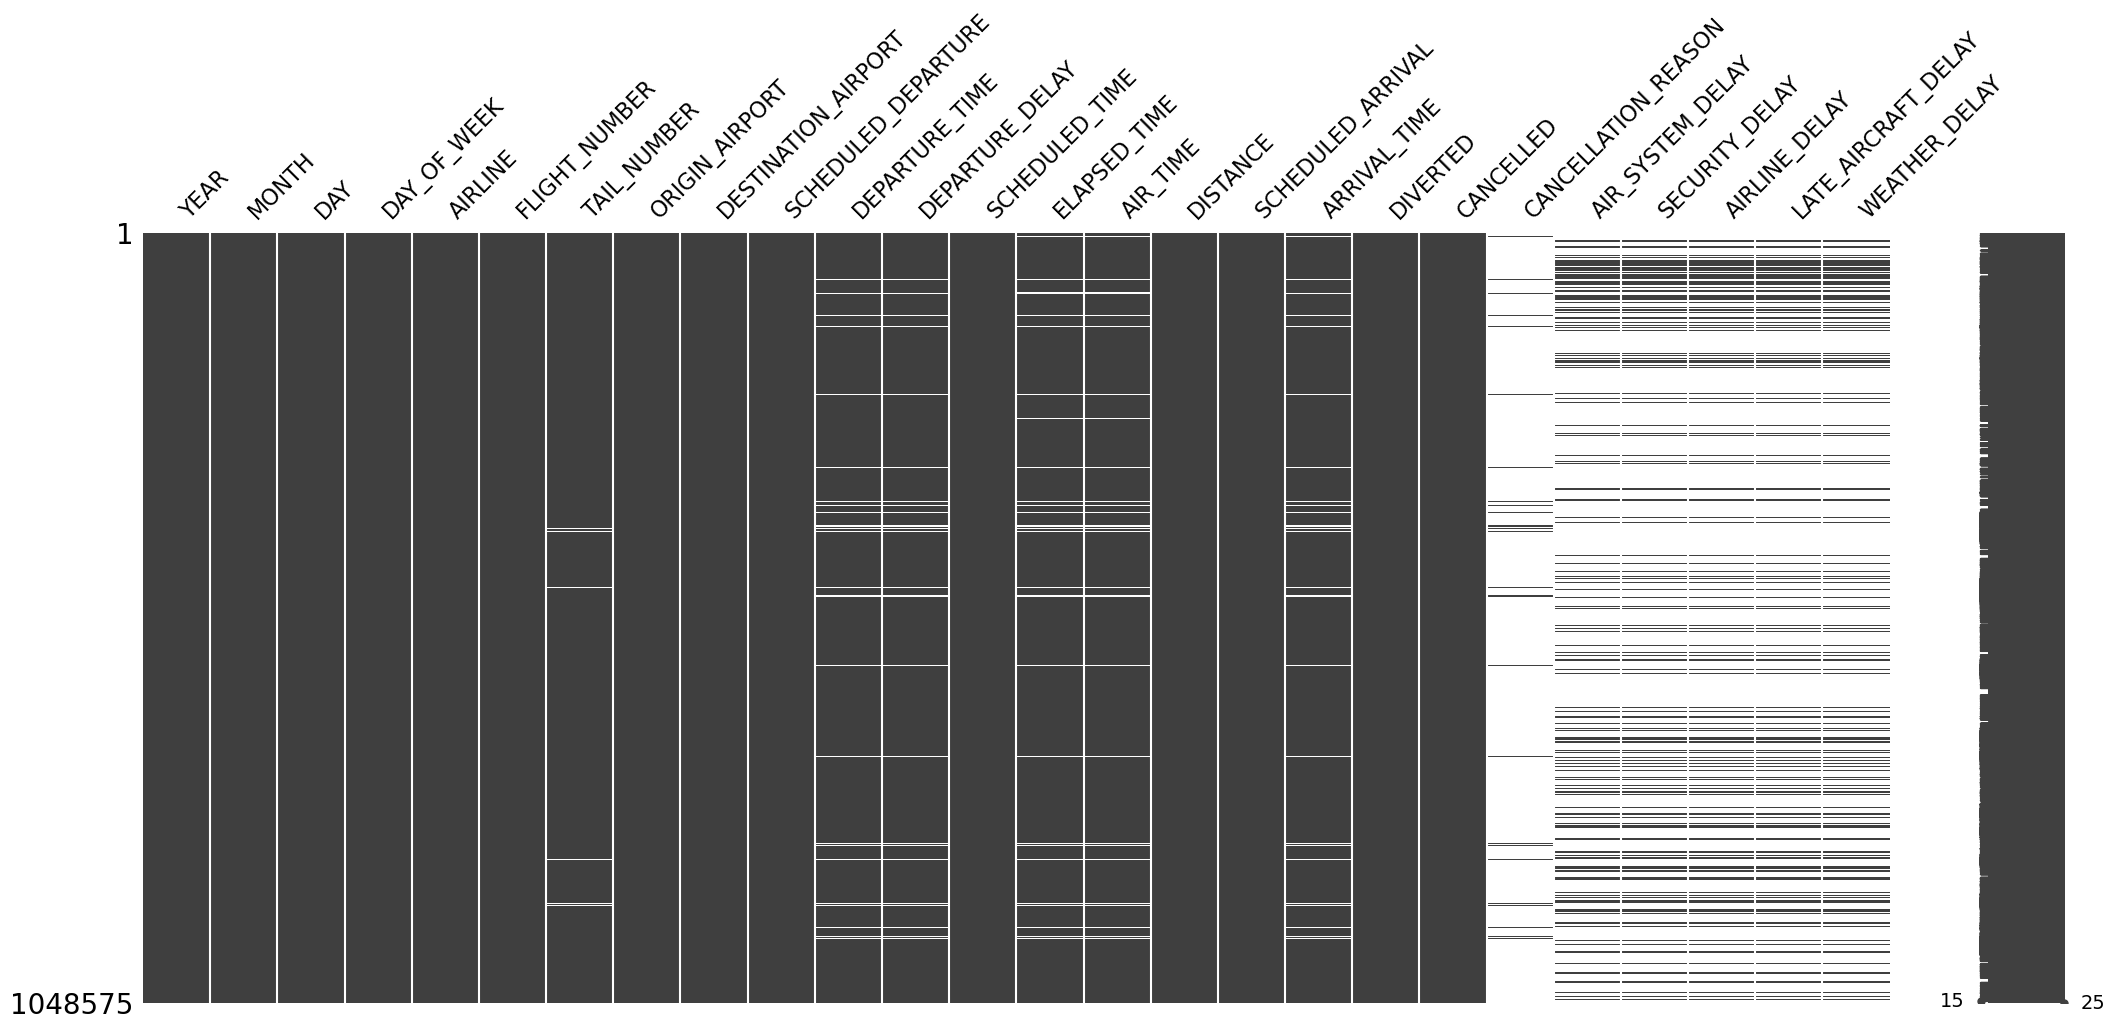

In [21]:
msno.matrix(df)

<Axes: >

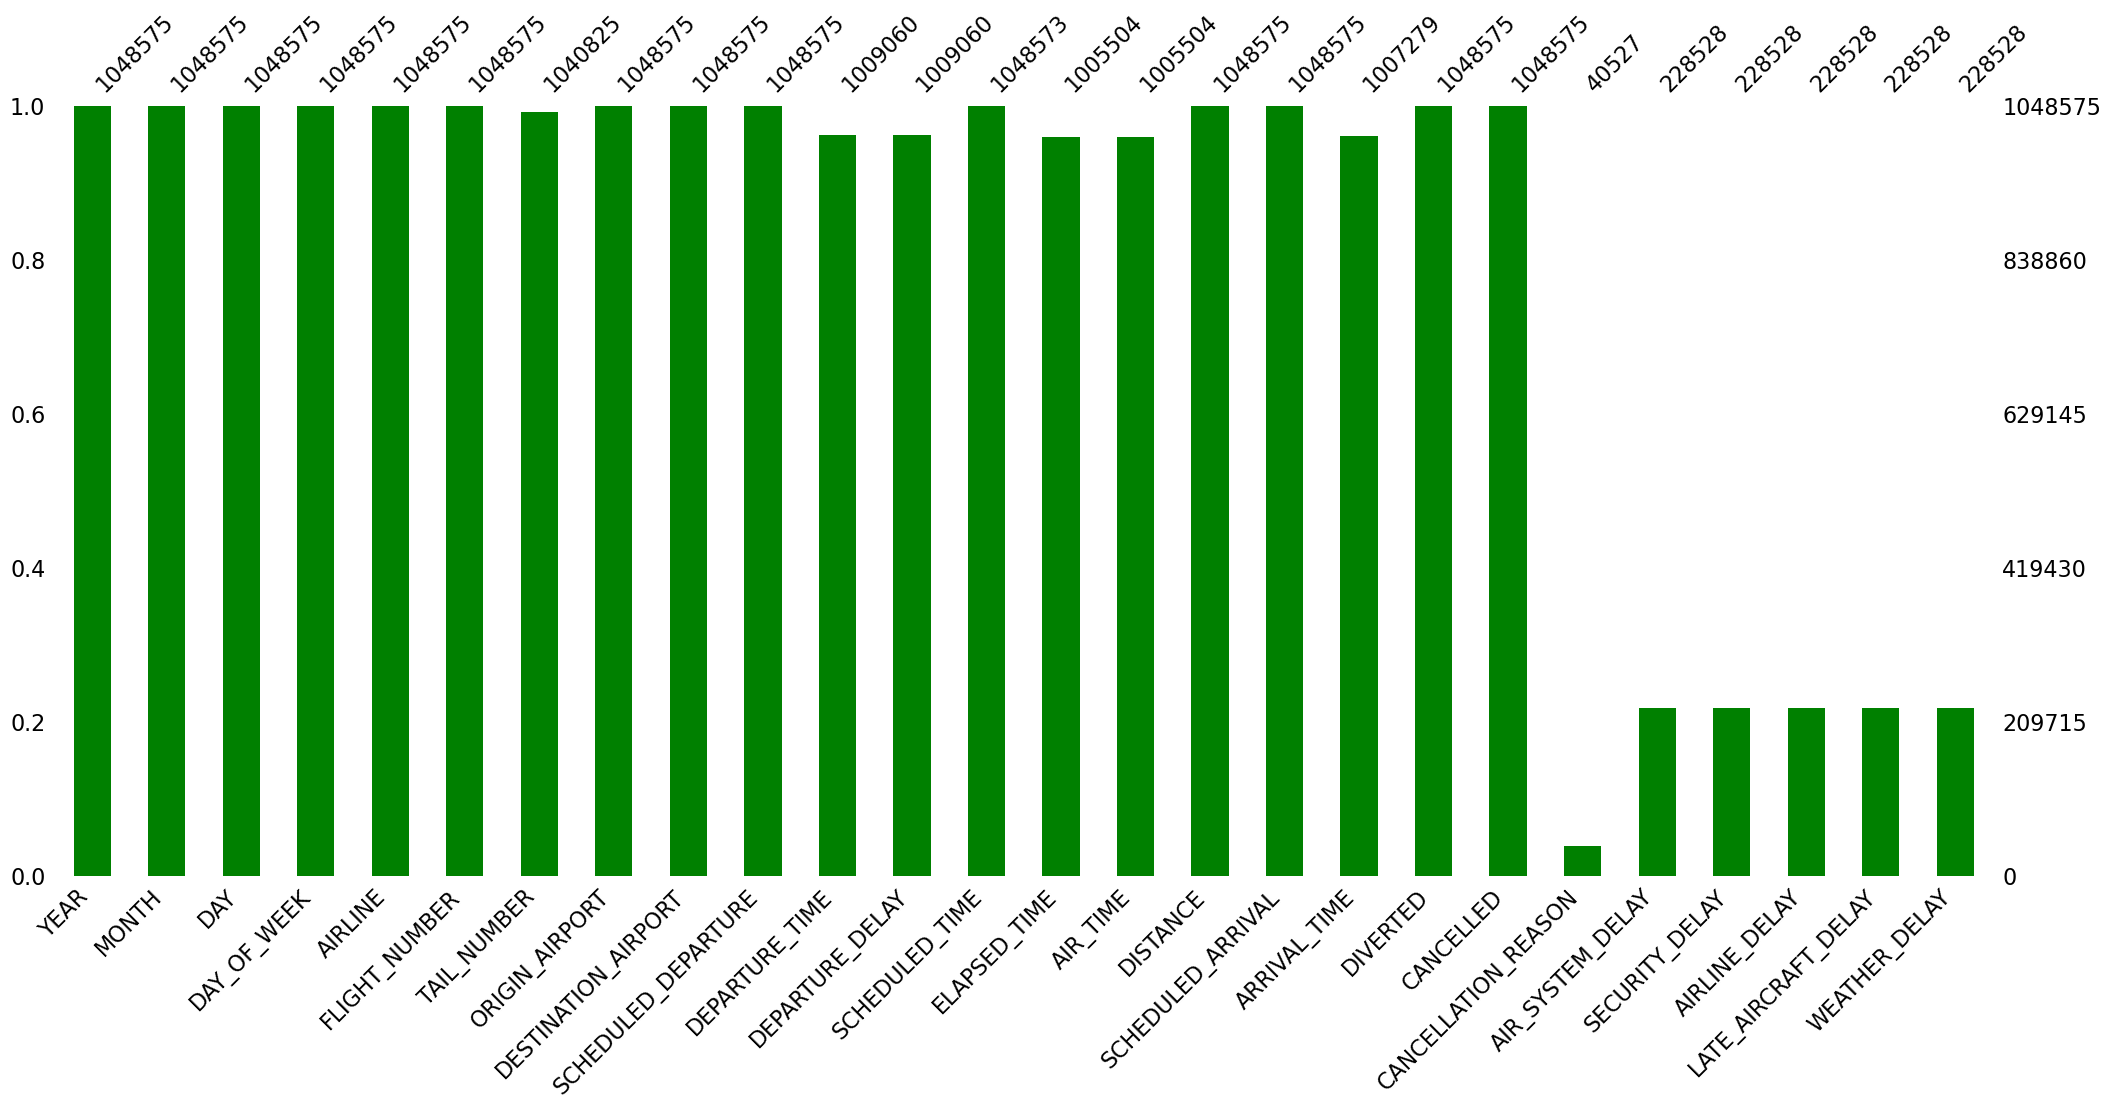

In [22]:
msno.bar(df, color='green')

In [8]:
# Numerical Data Statistics
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.009060e+06,1.009060e+06,1.008346e+06,1.008346e+06,1.048573e+06,1.005504e+06,1.005504e+06,1.048575e+06,1.007279e+06,1.007279e+06,1.048575e+06,1.007279e+06,1.005504e+06,1.048575e+06,1.048575e+06,228528.000000,228528.000000,228528.000000,228528.000000,228528.000000
mean,2015.0,1.694297e+00,1.382097e+01,3.953196e+00,2.256759e+03,1.322632e+03,1.333705e+03,1.133485e+01,1.665380e+01,1.357382e+03,1.402526e+02,1.369381e+02,1.127477e+02,8.034077e+02,1.485932e+03,7.549438e+00,1.504820e+03,1.492204e+03,7.612191e+00,2.426150e-03,3.864960e-02,13.692554,0.057328,18.203577,22.921458,3.545277
std,0.0,7.051508e-01,8.725656e+00,1.999436e+00,1.799166e+03,4.707748e+02,4.827415e+02,3.922372e+01,1.007006e+01,4.830351e+02,7.463458e+01,7.394818e+01,7.186952e+01,5.942362e+02,5.033515e+02,6.352526e+00,4.865613e+02,5.071090e+02,4.209367e+01,4.919620e-02,1.927585e-01,25.524897,1.779647,46.323146,41.888498,23.611555
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,2.000000e+01,1.500000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.550000e+02,9.200000e+02,9.280000e+02,-5.000000e+00,1.100000e+01,9.440000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.680000e+02,1.110000e+03,4.000000e+00,1.120000e+03,1.115000e+03,-1.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000e+00,1.300000e+01,4.000000e+00,1.725000e+03,1.319000e+03,1.329000e+03,-1.000000e+00,1.400000e+01,1.342000e+03,1.220000e+02,1.190000e+02,9.400000e+01,6.410000e+02,1.516000e+03,6.000000e+00,1.524000e+03,1.521000e+03,-3.000000e+00,0.000000e+00,0.000000e+00,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000e+00,2.100000e+01,6.000000e+00,3.485000e+03,1.720000e+03,1.731000e+03,1.100000e+01,1.900000e+01,1.745000e+03,1.730000e+02,1.690000e+02,1.440000e+02,1.046000e+03,1.911000e+03,9.000000e+00,1.915000e+03,1.917000e+03,1.200000e+01,0.000000e+00,0.000000e+00,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000e+00,3.100000e+01,7.000000e+00,9.794000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.870000e+02,4.983000e+03,2.400000e+03,2.020000e+02,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,830.000000,241.000000,1971.000000,1313.000000,1152.000000


In [9]:
# Categorical Data Statistics
df.describe(include=['bool', 'object'])

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,1048575,1040825,1048575,1048575,40527
unique,14,4522,315,315,4
top,WN,N477HA,ATL,ATL,B
freq,221586,809,66599,66741,28260


In [10]:
df.duplicated().sum()

0

- No duplicates

In [11]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [12]:
# Drop non-impactful columns
df.drop('TAXI_OUT', axis=1, inplace=True)
df.drop('WHEELS_OFF', axis=1, inplace=True)
df.drop('WHEELS_ON', axis=1, inplace=True)
df.drop('TAXI_IN', axis=1, inplace=True)
df.drop('ARRIVAL_DELAY', axis=1, inplace=True)

In [13]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')